In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install tensorflow==2.8.0
!pip install keras==2.8.0

In [ ]:
import tensorflow as tf
print(tf.__version__)

import keras
print(keras.__version__)


2.8.0
2.8.0


In [ ]:
from tensorflow.keras.layers import Dense, Flatten, Input, Lambda
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg19 import preprocess_input
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from keras.models import Sequential
from glob import glob
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

In [ ]:
IMAGE_SIZE = [224,224]

train_path = '/content/drive/MyDrive/train'
test_path = '/content/drive/MyDrive/test'

In [ ]:
train_datagen = ImageDataGenerator(rescale = 1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=False)

# Performing only scaling on the test dataset

test_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
train_set = train_datagen.flow_from_directory(train_path,
                                              target_size=(224,224),
                                              batch_size=32,
                                              class_mode = 'categorical')

test_set = test_datagen.flow_from_directory(test_path,
                                            target_size=(224,224),
                                            batch_size=32,
                                            class_mode='categorical')

Found 239 images belonging to 5 classes.
Found 239 images belonging to 5 classes.


In [ ]:
from tensorflow.keras.applications.inception_resnet_v2 import InceptionResNetV2
from tensorflow.keras.applications.inception_resnet_v2 import preprocess_input
from tensorflow.keras.models import Model
inc=InceptionResNetV2(input_shape = IMAGE_SIZE + [3], weights='imagenet', include_top=False)

219070464/219055592 [==============================] - 2s 0us/step


In [ ]:
x31 = Flatten()(inc.output)
predictionss = Dense(5, activation='softmax')(x31)

In [ ]:
modelss = Model(inputs = inc.inputs, outputs = predictionss)
modelss.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 111, 111, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 111, 111, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                             

In [ ]:
modelss.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
r2 = modelss.fit(train_set, validation_data=test_set, epochs=5, steps_per_epoch=len(train_set), validation_steps=len(test_set))
x=r2

Epoch 1/5
8/8 [==============================] - 402s 47s/step - loss: 2.6114 - accuracy: 0.5607 - val_loss: 3.5492 - val_accuracy: 0.4268
Epoch 2/5
8/8 [==============================] - 352s 45s/step - loss: 0.3543 - accuracy: 0.9289 - val_loss: 4.8287 - val_accuracy: 0.2427
Epoch 3/5
8/8 [==============================] - 349s 45s/step - loss: 0.1420 - accuracy: 0.9707 - val_loss: 25.4240 - val_accuracy: 0.2971
Epoch 4/5
8/8 [==============================] - 350s 44s/step - loss: 0.5043 - accuracy: 0.9163 - val_loss: 5108430.5000 - val_accuracy: 0.2092
Epoch 5/5
8/8 [==============================] - 354s 45s/step - loss: 0.2188 - accuracy: 0.9540 - val_loss: 98203760.0000 - val_accuracy: 0.2050


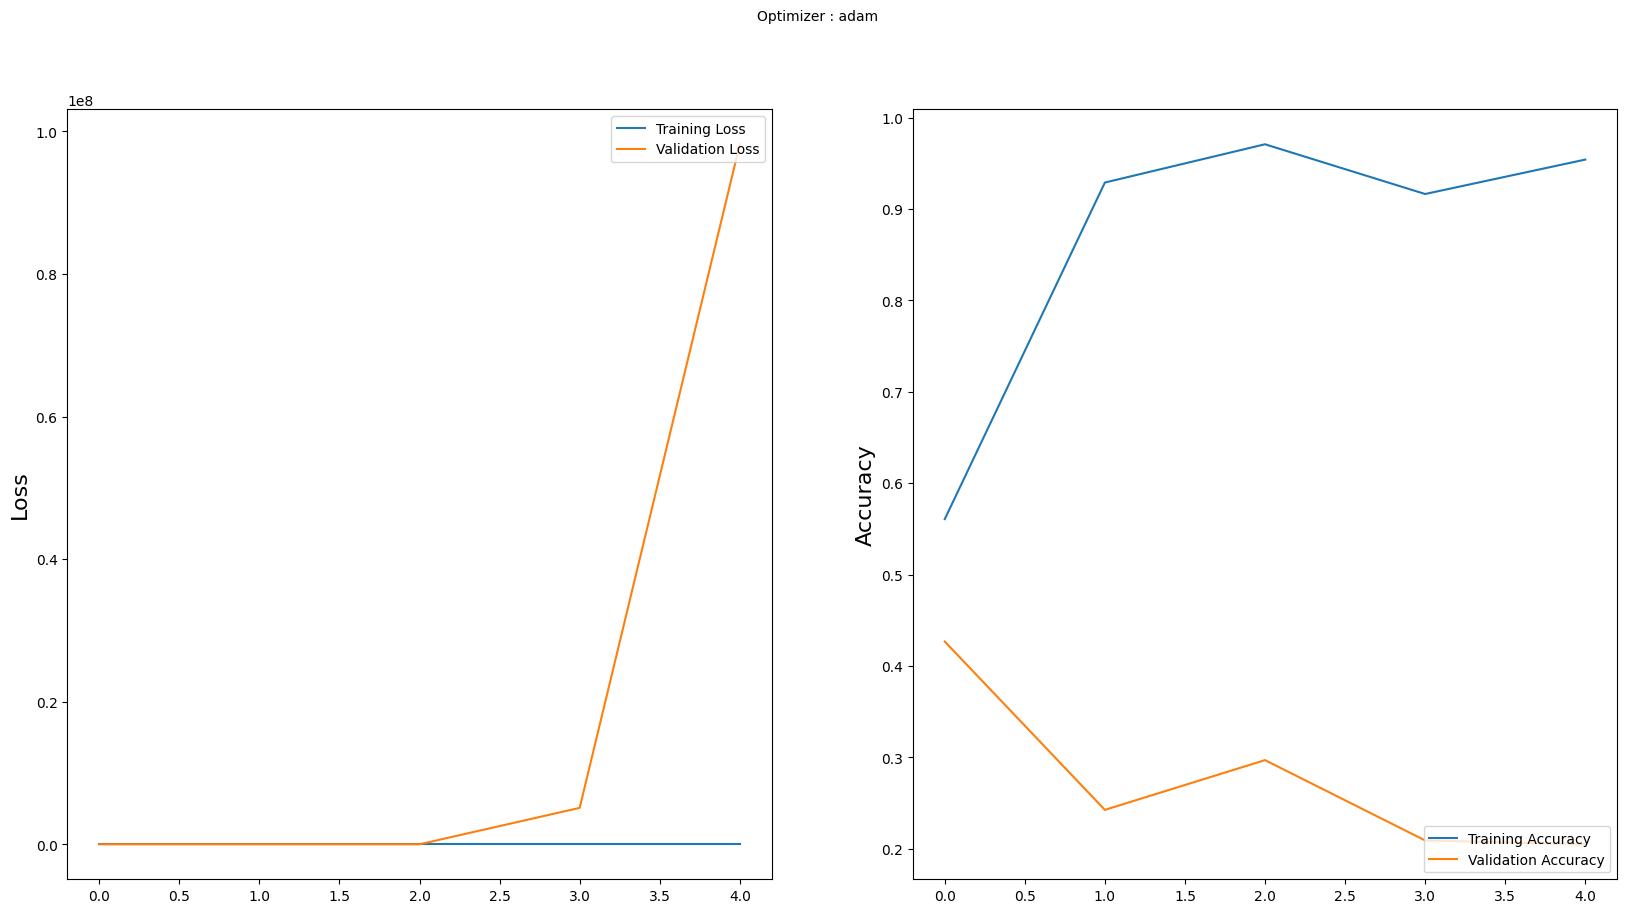

In [ ]:
import matplotlib.pyplot as plt

x=r2
plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(x.history['loss'], label='Training Loss')
plt.plot(x.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(x.history['accuracy'], label='Training Accuracy')
plt.plot(x.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

In [ ]:
modelss.save('/content/drive/MyDrive/plant/model1.h5')

In [ ]:
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization
import numpy as np

In [ ]:
np.random.seed(1000)

#Instantiation
RNN = Sequential()

#1st Convolutional Layer
RNN.add(Conv2D(filters=96, input_shape=(224,224,3), kernel_size=(11,11), strides=(4,4), padding='same'))
#RNN.add(BatchNormalization())
RNN.add(Activation('relu'))
RNN.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'))

#2nd Convolutional Layer
RNN.add(Conv2D(filters=256, kernel_size=(5, 5), strides=(1,1), padding='same'))
#RNN.add(BatchNormalization())
RNN.add(Activation('relu'))
RNN.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'))

#3rd Convolutional Layer
RNN.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='same'))
#RNN.add(BatchNormalization())
RNN.add(Activation('relu'))

#4th Convolutional Layer
RNN.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='same'))
#RNN.add(BatchNormalization())
RNN.add(Activation('relu'))

#5th Convolutional Layer
RNN.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='same'))
#RNN.add(BatchNormalization())
RNN.add(Activation('relu'))
RNN.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'))
#Passing it to a Fully Connected layer
RNN.add(Flatten())
# 1st Fully Connected Layer
RNN.add(Dense(4096, input_shape=(32,32,3,)))
#RNN.add(BatchNormalization())
RNN.add(Activation('relu'))
# Add Dropout to prevent overfitting
RNN.add(Dropout(0.4))
#2nd Fully Connected Layer
RNN.add(Dense(4096))
#RNN.add(BatchNormalization())
RNN.add(Activation('relu'))
#Add Dropout
RNN.add(Dropout(0.4))

#3rd Fully Connected Layer
RNN.add(Dense(1000))
#RNN.add(BatchNormalization())
RNN.add(Activation('relu'))
#Add Dropout
RNN.add(Dropout(0.4))

#Output Layer
RNN.add(Dense(5))
#RNN.add(BatchNormalization())
RNN.add(Activation('softmax'))

In [ ]:
RNN.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_203 (Conv2D)         (None, 56, 56, 96)        34944     
                                                                 
 activation_203 (Activation)  (None, 56, 56, 96)       0         
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 28, 28, 96)       0         
 2D)                                                             
                                                                 
 conv2d_204 (Conv2D)         (None, 28, 28, 256)       614656    
                                                                 
 activation_204 (Activation)  (None, 28, 28, 256)      0         
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 14, 14, 256)      0         
 2D)                                                    

In [ ]:
RNN.compile(loss = tensorflow.keras.losses.categorical_crossentropy, optimizer= 'adam', metrics=['accuracy'])

In [ ]:
#Learning Rate Annealer
from keras.callbacks import ReduceLROnPlateau
lrr= ReduceLROnPlateau(monitor='val_acc',   factor=.01,   patience=3,  min_lr=1e-5)

In [ ]:
r2 = RNN.fit(train_set, validation_data=test_set, epochs=10, steps_per_epoch=len(train_set), validation_steps=len(test_set))
x=r2

Epoch 1/10
8/8 [==============================] - 67s 9s/step - loss: 1.6351 - accuracy: 0.2050 - val_loss: 1.6097 - val_accuracy: 0.2092
Epoch 2/10
8/8 [==============================] - 65s 8s/step - loss: 1.6106 - accuracy: 0.1967 - val_loss: 1.6080 - val_accuracy: 0.2092
Epoch 3/10
8/8 [==============================] - 66s 8s/step - loss: 1.6086 - accuracy: 0.2008 - val_loss: 1.6067 - val_accuracy: 0.2092
Epoch 4/10
8/8 [==============================] - 64s 8s/step - loss: 1.6081 - accuracy: 0.1925 - val_loss: 1.6062 - val_accuracy: 0.2092
Epoch 5/10
8/8 [==============================] - 65s 8s/step - loss: 1.6070 - accuracy: 0.2008 - val_loss: 1.6063 - val_accuracy: 0.2092
Epoch 6/10
8/8 [==============================] - 65s 8s/step - loss: 1.6058 - accuracy: 0.1967 - val_loss: 1.6052 - val_accuracy: 0.2092
Epoch 7/10
8/8 [==============================] - 64s 8s/step - loss: 1.6087 - accuracy: 0.1967 - val_loss: 1.6045 - val_accuracy: 0.2092
Epoch 8/10
8/8 [==================

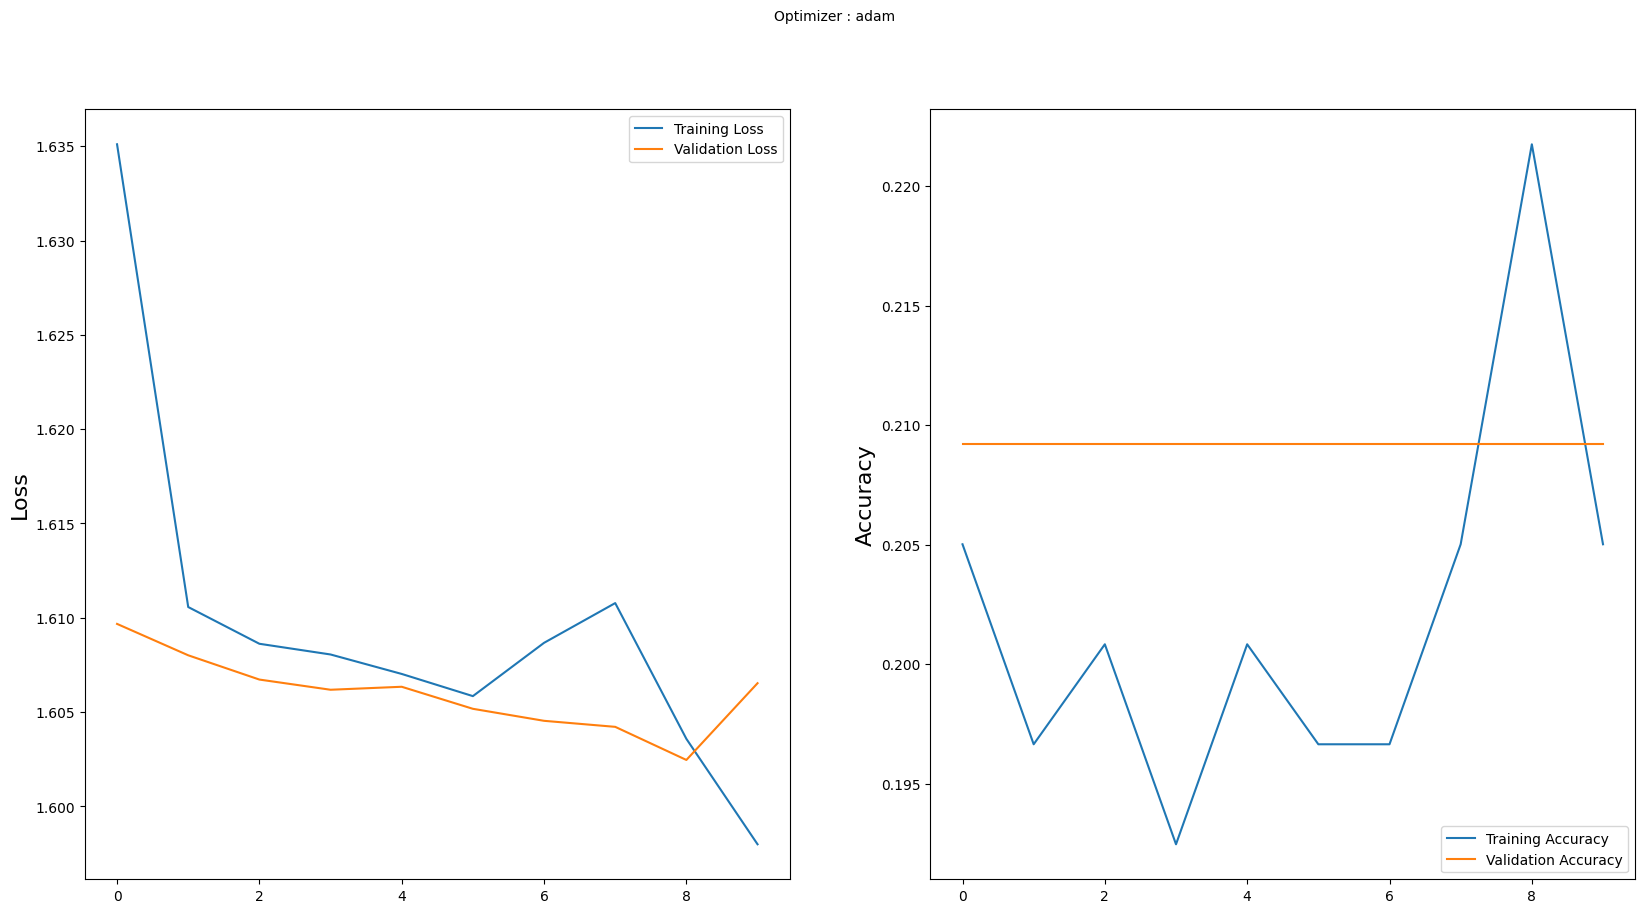

In [ ]:
import matplotlib.pyplot as plt

x=r2
plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(x.history['loss'], label='Training Loss')
plt.plot(x.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(x.history['accuracy'], label='Training Accuracy')
plt.plot(x.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

In [ ]:
from tensorflow.keras.applications import ResNet50
#from tensorflow.python.keras.models import Sequential
#from tensorflow.python.keras.layers import Dense, Flatten, GlobalAveragePooling2D
from keras import layers
from keras import models
base_model = models.Sequential()
base_model.add(ResNet50(include_top=False, weights='imagenet', pooling='max'))
base_model.add(Dense(5, activation='sigmoid'))

94781440/94765736 [==============================] - 1s 0us/step


In [ ]:
base_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 dense_5 (Dense)             (None, 5)                 10245     
                                                                 
Total params: 23,597,957
Trainable params: 23,544,837
Non-trainable params: 53,120
_________________________________________________________________


In [ ]:
from tensorflow.keras import optimizers
base_model.compile(optimizer = optimizers.SGD(lr=0.0001), loss = 'binary_crossentropy', metrics = ['acc'])

/usr/local/lib/python3.10/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [ ]:
resnet_history = base_model.fit(train_set, validation_data = test_set, epochs = 10)

Epoch 1/10
8/8 [==============================] - 266s 33s/step - loss: 4.2628 - acc: 0.2301 - val_loss: 2.0759 - val_acc: 0.2092
Epoch 2/10
8/8 [==============================] - 258s 35s/step - loss: 2.3086 - acc: 0.2762 - val_loss: 1.7462 - val_acc: 0.2092
Epoch 3/10
8/8 [==============================] - 256s 33s/step - loss: 1.7403 - acc: 0.2427 - val_loss: 1.6489 - val_acc: 0.2092
Epoch 4/10
8/8 [==============================] - 254s 32s/step - loss: 1.3285 - acc: 0.3180 - val_loss: 1.3572 - val_acc: 0.2092
Epoch 5/10
8/8 [==============================] - 255s 32s/step - loss: 1.3332 - acc: 0.3222 - val_loss: 1.3970 - val_acc: 0.2092
Epoch 6/10
8/8 [==============================] - 253s 34s/step - loss: 1.1392 - acc: 0.3347 - val_loss: 1.6634 - val_acc: 0.2050
Epoch 7/10
8/8 [==============================] - 256s 33s/step - loss: 1.1297 - acc: 0.3305 - val_loss: 1.9123 - val_acc: 0.2092
Epoch 8/10
8/8 [==============================] - 251s 32s/step - loss: 1.0245 - acc: 0.39

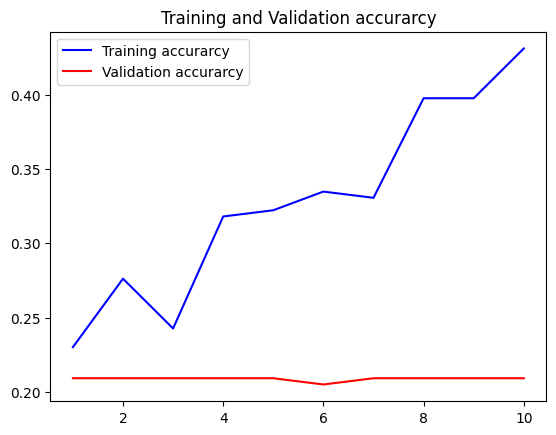

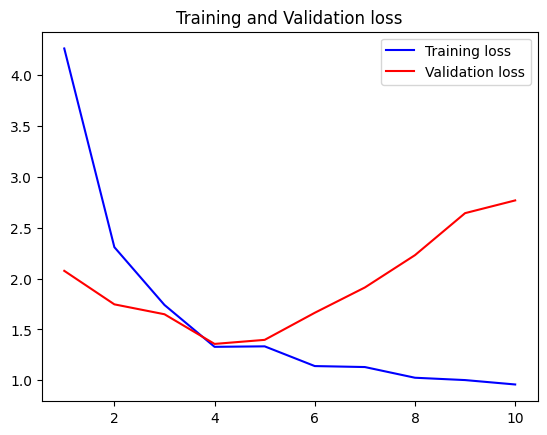

In [ ]:
import matplotlib.pyplot as plt
#get the details form the history object
acc = resnet_history.history['acc']
val_acc = resnet_history.history['val_acc']
loss = resnet_history.history['loss']
val_loss = resnet_history.history['val_loss']
epochs = range(1, len(acc) + 1)
#Train and validation accuracy
plt.plot(epochs, acc, 'b', label='Training accurarcy')
plt.plot(epochs, val_acc, 'r', label='Validation accurarcy')
plt.title('Training and Validation accurarcy')
plt.legend()
plt.figure()
#Train and validation loss
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()
plt.show()

In [ ]:
base_model.save('/content/drive/MyDrive/plant/model2.h5')

In [ ]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, GlobalAveragePooling2D, Dropout
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.optimizers import Adam

# Defining batch and epoch sizes
batch_size = 100
epochs = 20

# Defining the pretrained base model
base = Xception(include_top=False, weights='imagenet', input_shape=(224,224,3))
x = base.output
x = GlobalAveragePooling2D()(x)
# Defining the head of the model where the prediction is conducted
head = Dense(5, activation='softmax')(x)
# Combining base and head
model3 = Model(inputs=base.input, outputs=head)

# Compiling the model
model3.compile(optimizer=Adam(lr=0.0001),
              loss = 'categorical_crossentropy',
              metrics=['accuracy'])

# Fitting the model with train and validation augmented datasets.
history = model3.fit(train_set,
                              epochs = epochs,
                              validation_data = test_set)

Epoch 1/20
8/8 [==============================] - 314s 39s/step - loss: 1.3032 - accuracy: 0.5941 - val_loss: 1.2124 - val_accuracy: 0.4184
Epoch 2/20
8/8 [==============================] - 308s 39s/step - loss: 0.6226 - accuracy: 0.9456 - val_loss: 0.8717 - val_accuracy: 0.5858
Epoch 3/20
8/8 [==============================] - 308s 39s/step - loss: 0.2807 - accuracy: 0.9791 - val_loss: 0.5008 - val_accuracy: 0.8410
Epoch 4/20
8/8 [==============================] - 308s 39s/step - loss: 0.1045 - accuracy: 0.9958 - val_loss: 0.2328 - val_accuracy: 0.9749
Epoch 5/20
8/8 [==============================] - 309s 39s/step - loss: 0.0392 - accuracy: 1.0000 - val_loss: 0.1119 - val_accuracy: 0.9874
Epoch 6/20
8/8 [==============================] - 305s 39s/step - loss: 0.0263 - accuracy: 1.0000 - val_loss: 0.0648 - val_accuracy: 1.0000
Epoch 7/20
8/8 [==============================] - 307s 39s/step - loss: 0.0211 - accuracy: 1.0000 - val_loss: 0.0390 - val_accuracy: 1.0000
Epoch 8/20
8/8 [====

In [ ]:
model3.save('/content/drive/MyDrive/plant/model_xception.h5')

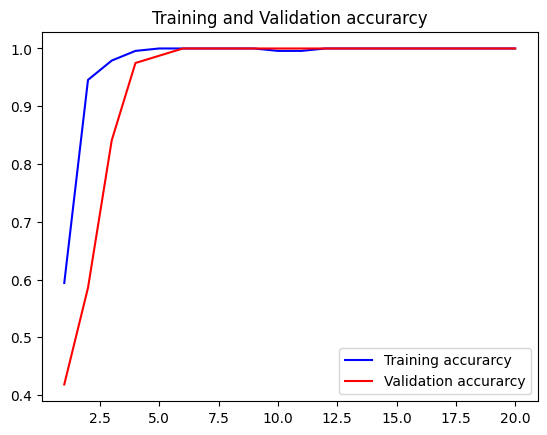

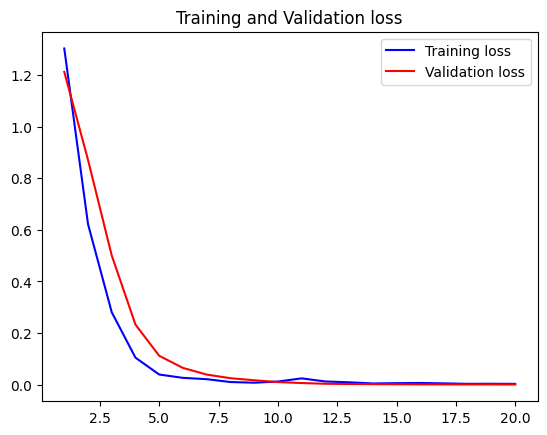

In [ ]:
import matplotlib.pyplot as plt
#get the details form the history object
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(accuracy) + 1)
#Train and validation accuracy
plt.plot(epochs, accuracy, 'b', label='Training accurarcy')
plt.plot(epochs, val_accuracy, 'r', label='Validation accurarcy')
plt.title('Training and Validation accurarcy')
plt.legend()
plt.figure()
#Train and validation loss
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(train_set, test_set, test_size=0.20, random_state=2)

In [ ]:
!pip install efficientnet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.7/50.7 kB 2.1 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import itertools
from sklearn.metrics import confusion_matrix
from tensorflow.keras.models import load_model, Model
from tensorflow.keras.layers import Input, Average, BatchNormalization
from tensorflow.keras.optimizers import Adam

# Set random seeds for reproducibility
seed(1)
tf.random.set_seed(1)

# Control Variables
batch_size = 128
num_epochs = 40

# Define the ensemble function
def ensemble():
    model_1 = load_model("/content/drive/MyDrive/plant/model1.h5", custom_objects={'BatchNormalization': BatchNormalization})
    model_1 = Model(inputs=model_1.inputs, outputs=model_1.outputs, name='Inception')

    model_2 = load_model("/content/drive/MyDrive/plant/model_xception.h5", custom_objects={'BatchNormalization': BatchNormalization})
    model_2 = Model(inputs=model_2.inputs, outputs=model_2.outputs, name='Xception')

    models = [model_1, model_2]

    models_input = Input(shape=(224, 224, 3))
    models_output = [model(models_input) for model in models]

    ensemble_output = Average()(models_output)

    simple_average = Model(inputs=models_input, outputs=ensemble_output, name='Ensemble')

    return simple_average

# Create and compile the ensemble model
model = ensemble()
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()
model.save('/content/drive/MyDrive/plant/all.h5')

# Confusion Matrix plotting function
def plot_confusion_matrix(y_val, y_pred, classes, normalize=False, title='Unnormalized confusion matrix', cmap=plt.cm.Blues):
    cm = confusion_matrix(y_val, y_pred)

    if normalize:
        cm = np.round(cm.astype('float') / cm.sum(axis=1)[:, np.newaxis], 2)

    np.set_printoptions(precision=2)

    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    thresh = cm.min() + (cm.max() - cm.min()) / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j], horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True expression')
    plt.xlabel('Predicted expression')
    plt.show()


Model: "Ensemble"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_8 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Inception (Functional)         (None, 5)            54528741    ['input_8[0][0]']                
                                                                                                  
 Xception (Functional)          (None, 5)            20871725    ['input_8[0][0]']                
                                                                                                  
 average_3 (Average)            (None, 5)            0           ['Inception[0][0]',       

In [ ]:
# Print the type and first few elements to understand the structure
print(f'Type of X_val: {type(X_val)}')
print(f'Number of elements in X_val: {len(X_val)}')
print('First few elements in X_val:')
for i, x in enumerate(X_val[:5]):  # Print the first 5 elements
    print(f'Element {i}: Type: {type(x)}, Value: {x}')


Type of X_val: <class 'list'>
Number of elements in X_val: 2
First few elements in X_val:
Element 0: Type: <class 'tuple'>, Value: (array([[[[0.7753635 , 0.7479125 , 0.81850076],
         [0.7764588 , 0.7490078 , 0.81959605],
         [0.77519554, 0.74774456, 0.8183328 ],
         ...,
         [0.5567683 , 0.50186634, 0.59990555],
         [0.5567044 , 0.5018024 , 0.59984165],
         [0.5451054 , 0.4902034 , 0.58824265]],

        [[0.77669674, 0.74924576, 0.819834  ],
         [0.7803541 , 0.7529031 , 0.82349133],
         [0.78037053, 0.75291955, 0.8235078 ],
         ...,
         [0.50452167, 0.4496197 , 0.5476589 ],
         [0.5407745 , 0.48587254, 0.5839118 ],
         [0.5584759 , 0.50357395, 0.60161316]],

        [[0.78956103, 0.76211005, 0.83269835],
         [0.7895864 , 0.76213545, 0.8327237 ],
         [0.7896193 , 0.76216835, 0.8327566 ],
         ...,
         [0.5264284 , 0.4715264 , 0.56956565],
         [0.5340963 , 0.47919437, 0.57723355],
         [0.55542773, 0

In [ ]:
# Assuming each element in X_val is a tuple or list with varying shapes
# Print the shapes of individual arrays within each element
for i, x in enumerate(X_val):
    if isinstance(x, (list, tuple)):
        for j, sub_x in enumerate(x):
            print(f'Shape of element {i}, sub-element {j}: {np.array(sub_x).shape}')
    else:
        print(f'Shape of element {i}: {np.array(x).shape}')


Shape of element 0, sub-element 0: (32, 224, 224, 3)
Shape of element 0, sub-element 1: (32, 5)
Shape of element 1, sub-element 0: (32, 224, 224, 3)
Shape of element 1, sub-element 1: (32, 5)


In [ ]:
# Check the type and shape of the first few images
for i, img in enumerate(features[:5]):  # Check the first 5 images
    if isinstance(img, np.ndarray):
        print(f'Image {i} type: {type(img)}, shape: {img.shape}')
    else:
        print(f'Image {i} is not a NumPy array, type: {type(img)}')



Image 0 type: <class 'numpy.ndarray'>, shape: (32, 224, 224, 3)
Image 1 type: <class 'numpy.ndarray'>, shape: (32, 224, 224, 3)


In [ ]:
for i, img in enumerate(valid_features):
    print(f'Image {i} dimensions: {img.shape}')
    if img.size == 0:
        print(f'Image {i} is empty')


Image 0 dimensions: (32, 224, 224, 3)
Image 1 dimensions: (32, 224, 224, 3)


In [ ]:
import cv2
import numpy as np

# Function to resize an image
def resize_image(image, target_size=(224, 224)):
    if image.size == 0:
        raise ValueError('Image is empty')

    # Ensure the image is not grayscale
    if len(image.shape) == 2:  # Grayscale image
        image = cv2.cvtColor(image, cv2.COLOR_GRAY2RGB)
    elif len(image.shape) == 3 and image.shape[2] == 1:  # Single channel image
        image = cv2.cvtColor(image, cv2.COLOR_GRAY2RGB)

    # Resize image
    resized_image = cv2.resize(image, target_size)

    return resized_image

# Flatten the batch dimensions to process individual images
flattened_images = [img for batch in valid_features for img in batch]

# Resize all individual images
resized_images = [resize_image(img) for img in flattened_images]

# Convert resized images to a NumPy array
resized_images_array = np.array(resized_images)

# Check the shape of the resized images array
print(f'Resized images array shape: {resized_images_array.shape}')


Resized images array shape: (64, 224, 224, 3)


In [ ]:
# Confirm target size
target_size = (224, 224)
print(f'Target size: {target_size}')


Target size: (224, 224)


In [ ]:
for i, element in enumerate(X_val):
    print(f'Element {i} type: {type(element)}')
    if isinstance(element, (list, tuple)):
        for j, sub_element in enumerate(element):
            print(f'  Sub-element {j} shape: {np.shape(sub_element)}')
    else:
        print(f'Element {i} shape: {np.shape(element)}')


Element 0 type: <class 'tuple'>
  Sub-element 0 shape: (32, 224, 224, 3)
  Sub-element 1 shape: (32, 5)
Element 1 type: <class 'tuple'>
  Sub-element 0 shape: (32, 224, 224, 3)
  Sub-element 1 shape: (32, 5)


In [ ]:
valid_images = []
for element in X_val:
    if isinstance(element, (list, tuple)) and len(element) > 0:
        images = element[0]  # Adjust this if the image data is in a different position
        for img in images:
            if img.shape == (224, 224, 3):  # Check for expected image shape
                valid_images.append(img)

# Convert to a NumPy array
X_val_array = np.array(valid_images)

# Ensure the shape is correct
if X_val_array.ndim != 4 or X_val_array.shape[1:] != (224, 224, 3):
    raise ValueError(f'X_val has an incorrect shape: {X_val_array.shape}. It should be (batch_size, 224, 224, 3).')


In [ ]:
print(f'Valid images shape: {X_val_array.shape}')


Valid images shape: (64, 224, 224, 3)


In [ ]:
y_pred_ = model.predict(X_val_array, verbose=1)
y_pred = np.argmax(y_pred_, axis=1)
print(f'Predicted labels: {y_pred}')


2/2 [==============================] - 39s 16s/step
Predicted labels: [2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


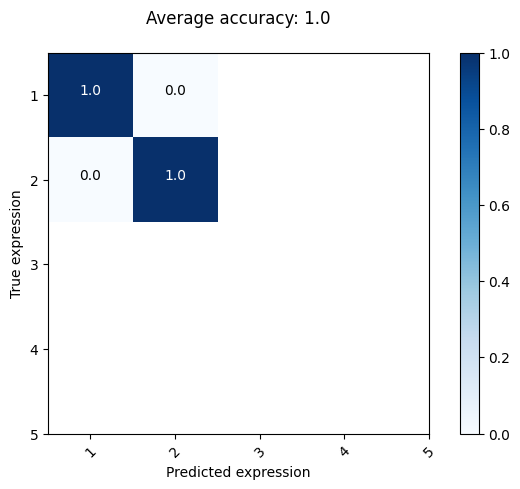

In [ ]:
classes = np.array(("1", "2", "3", "4", "5"))
fig = plot_confusion_matrix(y_val=y_pred, y_pred=y_pred,
                      classes=classes,
                      normalize=True,
                      cmap=plt.cm.Greys,
                      title='Average accuracy: ' + str(np.sum(y_pred == y_pred)/len(y_pred)) + '\n')
